# Herman Dávid Tamás
# Farkasok és bárányok populációmodell

## Előszó

A "Farkasok és bárányok" egy NetLogoban készült ágens alapú modell saját programozású mesa implementációja, illetve továbbfejlesztése.
Ez a modell egy ragadozófaj és annak egy prédájának populációinak együttélését modellezi háromféleképpen.
Az alapértelmezett modelltípus a saját bővítéseimet tartalmazza, míg a másik kettő az eredeti modell két típusát hivatott a lehető leghűbben implementálni.

## A modelltípusok működési jellemzői

### Közös jellemzők

Mindhárom modellben van két állatfaj, egy ragadozó és annak egy prédája, amelyeket mint farkasok és bárányok reprezentálunk.
Ezek az állatok egy füves területen élnek és a bárányok legelik a füvet, a farkasok megeszik a bárányokat.
Továbbá minden egyednek van valamennyi energiája (továbbiakban energiapont), amely minden lépésben (a modell állapotváltozása) eggyel csökken, de evés által a megadott paraméternyivel megnő. Ha elfogy az energiájuk (nem 0, hanem kevesebb, mint 0 energiapont), akkor meghalnak. Ezek mellett képesek is szaporodni valószínűségi alapon, azonban ekkor az energiájuk megfeleződik.

Az eredeti modellben a fű mint "patchek" voltak a cellákba helyezve, míg ebben az implementációban ágensként. Mindhárom modell esetén annyi fű ágens van ahány cella. A fűnek két állapota van, a kinőtt és a lelegelt.

Új paraméterek, amely mindhárom modellnél működnek:

* A farkasok aktívan vadásszanak-e.

* A vadászatot korlátozó kitevő. Lásd lejjebb.

* A bárányok nyájba igyekezzenek-e szerveződni.

* A random függvényeket szabályzó seed. A seed segítségével reprodukálhatóvá válnak a futtattások, de használata opcionális.

A vadászatot korlátozó kitevő azt jelenti, hogy annak a valószínűsége, hogy egy farkas aktívan vadászik $\text{energiapont}^{-|\text{kitevő}|}$. Tehát, ha a kitevő 0, akkor nincs korlátozás. Fontos megjegyezni, hogy a kitevő azért nempozitív, mert különben több energiapont nagyobb valószínűséget jelentene, ami értelmetlen, mivel a kitevőt amiatt vezettem be, mert a korlátlan vadászat túlvadászatot eredményez.

### Farkasok és bárányok

* A legegyszerűbb modelltípus, amely az eredeti modellből lett közvetlenül implementálva.

* Minden fű mindig ki van nőve.

* A bárányoknak végtelen energiájuk van (nem változik).

* A farkasok megadott valószínűséggel esznek meg egy bárányt abból a cellából amelyen ők is vannak.

* Az egyedek megadott valószínűséggel hoznak világra utódot, amely utód az egyik szomszédos cellába kerül.

### Farkasok, bárányok és fű

* Szintén az eredeti modellből implementálva

* A fentiek érvényesek az alábbiak mellett.

* A bárányok energiája ugyanúgy változik, mint a farkasoké.

* A lelegelt fű ágensek megadott lépésenként nőnek ki újra.

### Bővített modell

* Az általam bővített modelltípus.

* Az állat ágenseknek van neme.

* A szaporodáshoz a valószínűség mellett két különböző nemű egyed kell legyen egy közös cellában és mindkét szűlőnek "akarnia" kell.

* Az új szaporodási feltételek miatt egy szülő szaporodási valószínűsége a paraméter gyöke, így a két szülő együtt adja ki a paramétert.

## Megfigyelések

A megfigyelések leírása előtt rögzíteném a kiindulási paramétereket, amelyeket nagyrészt az eredeti modellből választottam, de a bárányok energiapont szerzését, növeltem a stabbilitás érdekében.
Az életteret reprezentáló rács szélei össze vannak kötve egymással azaz, ha egy állat például egy felső szélen lévő cellából felfelé lép, akkor az alsó szélen lyukad ki.
A farkasok kezdeti száma 50, a bárányoké 100. A farkasok egy bárány megevésével szintén 20 energiapontot szereznek, míg a bárányok egy cellányi fűből 20 energiapontot nyernek (eredetileg 4-et).
A farkasok 5, a bárányok 4% valószínűséggel szaporodnak. A lelegelt fű 30 lépésenként nő vissza. A farkasok aktívan vadásznak, a bárányok nyájba igyekeznek szerveződni.
A vadászatot korlátozó kitevő $-0,5$, a seed 474.

A modell elemzés szempontjából legérdekesebb tulajdonsága a stabilitása, vagyis milyen paraméterek mellett nem halnak ki az állatok, illetve nem szaporodnak túl.

Először egy az eredeti modell esetében is stabil beállításról beszélnék, arról, amikor a farkasok, bárányok és fű modellben a farkasok kezdeti számát nullára állítjuk. Ha a modellem minden paraméterét alapértelmezetten hagyunk kivéve a farkasok kezdeti számát, akkor is stabil modellt kapunk, szép nagy nyájakkal. Ha azonban a bárányok fűből nyert energiapontmennyiségét visszaállítjuk 4-re, akkor a bárányok párokba szerveződnek és könnyen előfordulhat, hogy a populáció egyneművé válik, tehát a modell így nem stabil. A párokba szerveződésnek az az eddig nem említett oka, hogy, ha egy báránynak 0 energiapontja van, akkor nem korlátozom a mozgásukat (bármely szomszédos cellába léphetnek, ez az alapértelmezett viselkedés is) a túlélés valószínűségének növelése érdekében.

## A vizualizációs program

### Futattás

A modell vizualizációjáért a mesa_viz_tornado python csomag felelős (a Python tehát előfeltétele a futtatásnak), ami a mesa 2.4.0 verziójának telepítésekor automatikusan települ, azonban az ennél újabb verziók (3.0.0+) már nem használják, ezért a kompatibilitás érdekében közvetlenül importáltam a belőle szükséges elemeket.

A vizualizációs programot többféleképpen is el lehet indítani. Egyik lehetőség az ezen notebookkal egy mappában lévő run.py fálj futtatása, vagy a mappában megnyitott parancsorba azt írjuk be, hogy "mesa runserver" idézjelek nélkül.

Sajnálatos módon, csak Linux alatt ajánlott a futtatás, mert valamilyen ok folytán Windows alatt a mesa_viz_tornado által generált weboldalon nem jelennek meg rendesen az interaktív elemek, de ettől függetlenül minden működik. Azonban WSL-lel vagy virtuális géppel Windowson is hibátlanul futattható, de a Microsoft Edge böngésző így sem tudja megjeleníteni az érintett elemeket, de a Firefox és a Google Chrome igen. Mindkét módszert Debian Linuxszal teszteltem. Én a WSL megoldást javaslom, mert a kiírt IP-címes URL működik (http://127.0.0.1:8521, amivel egyenértékű a http://localhost:8521) a virtuális gép esetével ellentétben, ahol a programtól és annak beállításaitól függ az IP-cím.

### Kezelés

## Vizualizáció nélküli futtattás

Az alábbi cella futtattásával a modell alapértelmezett paramétereivel 100 lépés szimulálható és az adatokat egy pontosvesszővel elválasztott csv fájlba írható, amelyben tizedesvesszőt és nem tizedespont van. Igény szerint ez a df.to_csv sep és decimal paraméterrével megváltoztatható, illetve az első paraméter a fájlnév. A lépésszám a range(100)-ban a 100 átállításával változtatható meg. Én az 1000 vagy 2000 lépésszámot ajánlom, de a futtattás időbe telik.

,Number of wolves,Number of sheep,Number of female wolves,Number of male wolves,Number of female sheep,Number of male sheep,Ratio of grass patches (%)
Step,,,,,,,
0,50,100,22,28,53,47,49.777778
1,49,95,22,27,49,46,46.777778
2,48,91,21,27,47,44,45.888889
3,48,87,21,27,44,43,44.666667
4,48,84,21,27,44,40,45.333333
...,...,...,...,...,...,...,...
96,30,91,13,17,30,61,81.777778
97,30,91,13,17,29,62,81.222222
98,29,97,12,17,31,66,81.000000


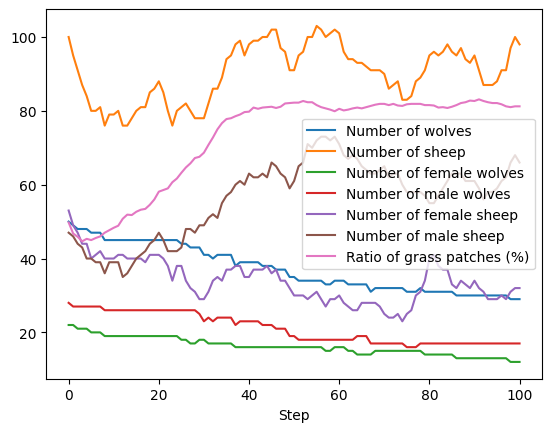

In [20]:
from wolfsheep import WolfSheepModel


model = WolfSheepModel(30, 30, True, "Extended model", 50, 100, 20, 20, 5, 4, 30, True, True, -0.5, True, 474)
for i in range(100):
    model.step()
df = model.datacollector.get_model_vars_dataframe()
df.index.name = "Step"
df.plot()
df.to_csv("data.csv", sep=";", decimal=",")
df

## Hivatkozások

* Wilensky, U. (1997). NetLogo Wolf Sheep Predation model. http://ccl.northwestern.edu/netlogo/models/WolfSheepPredation. Center for Connected Learning and Computer-Based Modeling, Northwestern University, Evanston, IL.